In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
sns.set()


data='./Data'

transactions=pd.read_csv(os.path.join(data,'sales_train_v2.csv'))
items= pd.read_csv(os.path.join(data, 'items.csv'))
item_categories=pd.read_csv(os.path.join(data, 'item_categories.csv'))
shops=pd.read_csv(os.path.join(data, 'shops.csv'))

In [70]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


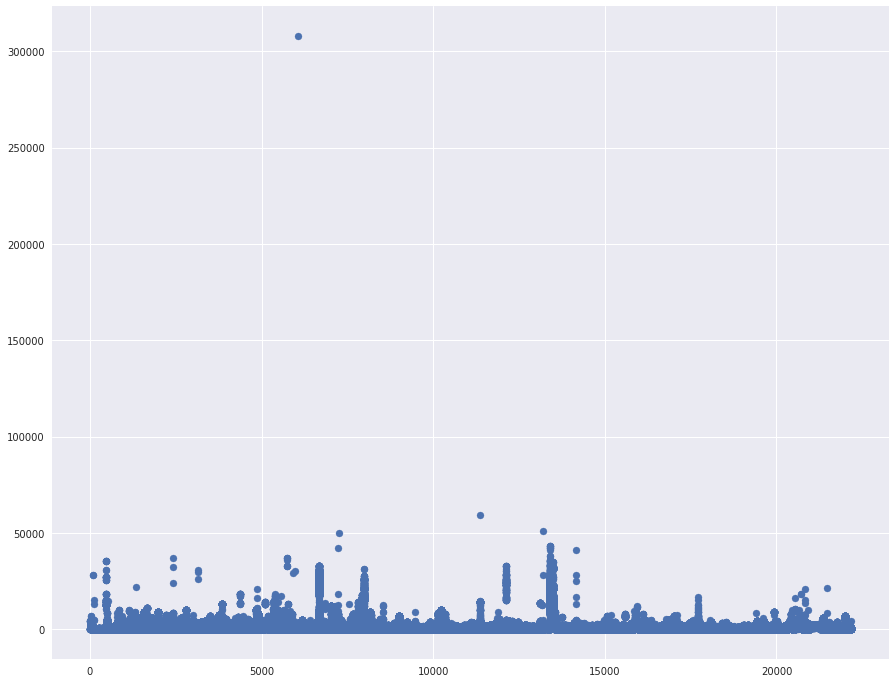

In [24]:
plt.figure(figsize=(15,12))
plt.scatter(transactions['item_id'],transactions['item_price'])

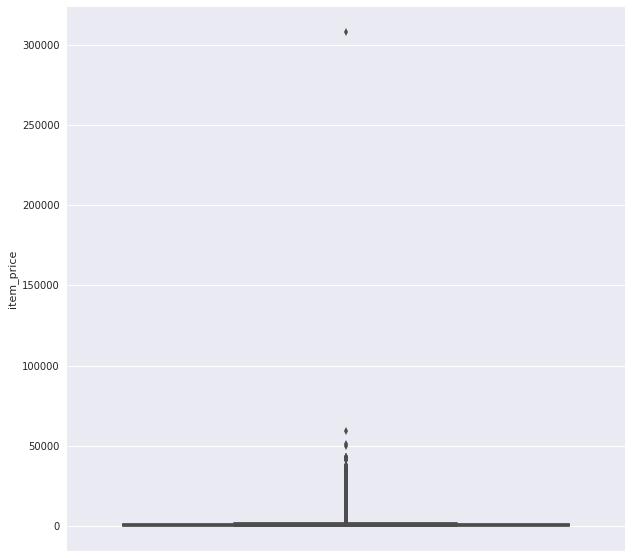

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(y=transactions['item_price'],data=transactions)

In [20]:
outlier_id=transactions[transactions['item_price']==transactions['item_price'].max()]['item_id'].values[0]
transactions[transactions['item_id']==outlier_id]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [25]:
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [43]:
x,y=np.percentile(transactions['item_price'].astype('float64'),q=[1,99])

In [46]:
cut=np.clip(transactions['item_price'],x,y)

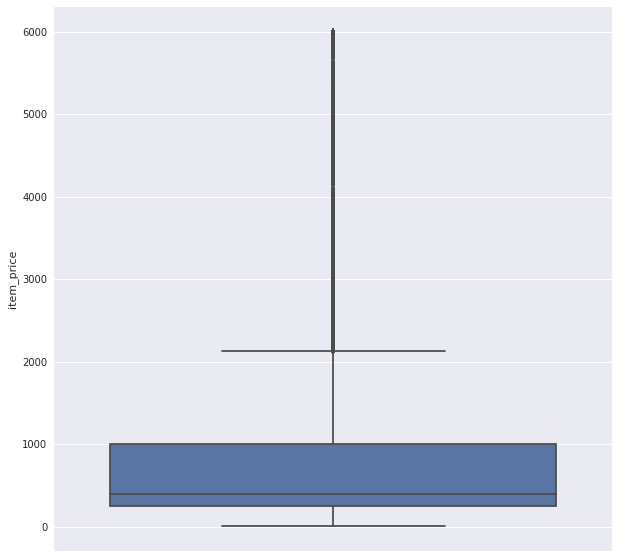

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(y=cut)

In [54]:
transactions['item_price'].mean()

890.85323269801256

In [55]:
cut.mean()

804.99425224140339

In [69]:
transactions['date']=pd.to_datetime(transactions['date'])

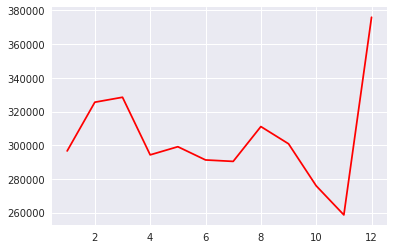

In [71]:
transactions['month']=transactions['date'].dt.month
dates=transactions.groupby('month')['item_cnt_day'].sum()

plt.plot(dates.index,dates.values,c='r')

In [74]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-02-01,0,59,22154,999.00,1.0,2
1,2013-03-01,0,25,2552,899.00,1.0,3
2,2013-05-01,0,25,2552,899.00,-1.0,5
3,2013-06-01,0,25,2554,1709.05,1.0,6
4,2013-01-15,0,25,2555,1099.00,1.0,1
